In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
df=pd.read_csv('./nombre_depanes_par_mois.csv', encoding='latin-1',sep=";")
df.head()

,Date début,Number of Orders
0,2019-01,399
1,2019-02,252
2,2019-03,307
3,2019-04,296
4,2019-05,230


In [2]:
df= df[df['Date début'] <'2022-03']
df.tail()

,Date début,Number of Orders
33,2021-10,255
34,2021-11,296
35,2021-12,305
36,2022-01,230
37,2022-02,232


In [3]:
df['Date début'] = pd.to_datetime(df['Date début'], format='%Y-%m')

In [4]:
df.index = df['Date début']
del df['Date début']
df.head()

,Number of Orders
Date début,
2019-01-01,399
2019-02-01,252
2019-03-01,307
2019-04-01,296
2019-05-01,230


<AxesSubplot:xlabel='Date début', ylabel='Number of Orders'>

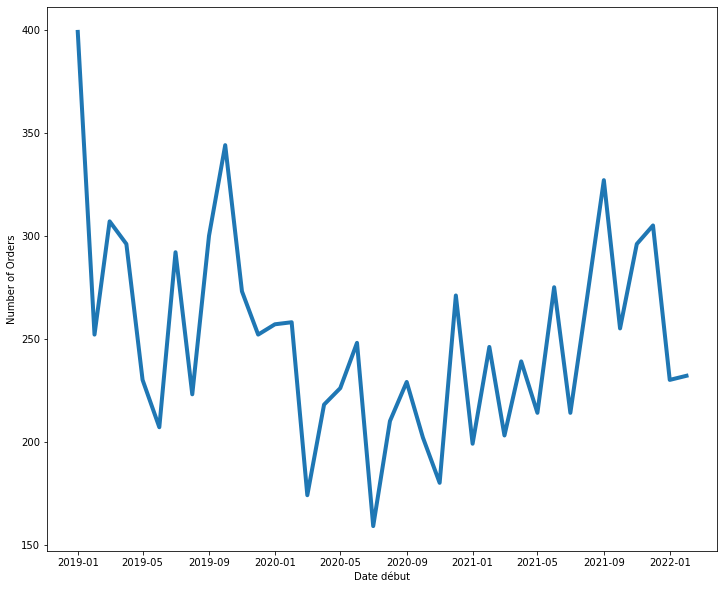

In [5]:
plt.figure(figsize=(12, 10))
sns.lineplot(data=df, x=df.index, y=df['Number of Orders'], linewidth=4)

In [6]:
msk=(df.index <'2021-07-30')
df_train=df[msk].copy()
df_test=df[~msk].copy()

In [7]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True)

<AxesSubplot:xlabel='Date début'>

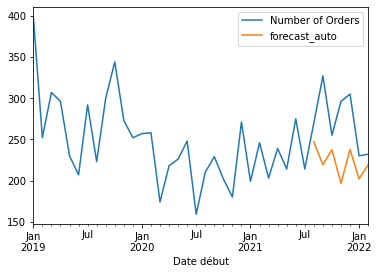

In [8]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df.plot()

In [9]:
sarima= pm.auto_arima(df_train, m=12)
sarima

ARIMA(order=(5, 1, 0), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

<AxesSubplot:xlabel='Date début'>

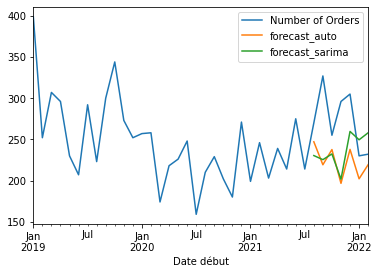

In [10]:
forecast_sarima = sarima.predict(n_periods=len(df_test))
df['forecast_sarima'] = [None]*len(df_train) + list(forecast_sarima)

df.plot()

In [11]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
mae = mean_absolute_error(df_test, forecast_test_auto)
r2 = r2_score(df_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'r2- auto: {r2}')
print(f'rmse - auto: {rmse}')

mae - auto: 50.76975756408438
r2- auto: -2.336384507080737
rmse - auto: 63.009216662855


In [12]:
mae = mean_absolute_error(df_test, forecast_sarima)
r2 = r2_score(df_test, forecast_sarima)
rmse = np.sqrt(mean_squared_error(df_test, forecast_sarima))

print(f'mae - auto: {mae}')
print(f'r2 - auto: {r2}')
print(f'rmse - auto: {rmse}')

mae - auto: 49.88089783881875
r2 - auto: -1.9329362308830147
rmse - auto: 59.0768516685503
